importing modules

In [1]:
import tensorflow as tf
from tensorflow import keras 
from keras import layers, models 
from keras.datasets import mnist 
from keras.datasets import cifar10
import time
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers

data manipulation

In [2]:
gpus = tf.config.list_physical_devices('CPU')

if gpus:
    print("Using GPU")
else:
    print("No GPU found, using CPU")

(x_train, y_train), (x_test, y_test) = cifar10.load_data()


x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0






Using GPU


RMSprop optimization

In [3]:
model_1 = models.Sequential(
    [
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(10, activation='softmax')
    ]
)
model_1.summary()

model_1.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001), 
    loss=keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy'], 
    loss_weights=None,
    sample_weight_mode=None, 
    weighted_metrics=None
)


T1= time.time()
history_1 = model_1.fit(x_train, y_train, epochs=100, batch_size=1024, validation_split=0.5)
T2= time.time()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 10)                30730     
                                                                 
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 4s 37ms/step - loss: 2.6077 - accuracy: 0.1734 - val_loss: 2.2173 - val_accuracy: 0.2061
Epoch 2/100
25/25 [==============================] - 0s 16ms/step - loss: 2.2335 - accuracy: 0.2287 - val_loss: 2.2196 - val_accuracy: 0.2228
Epoch 3/100
25/25 [==============================] - 0s 15ms/step - loss: 2.1746 - accuracy: 0.2522 - val_loss: 2.3163 - val_accuracy: 0.2208
Epoch 4/100
25/25 [===

evaluating 

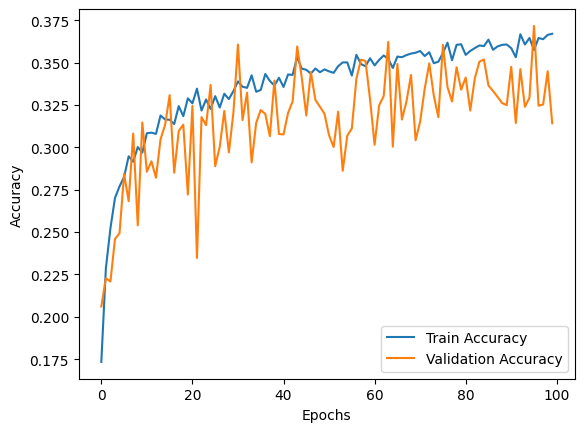

313/313 [==============================] - 1s 3ms/step - loss: 1.9966 - accuracy: 0.3102
Test Loss: 1.9965912103652954
Test Accuracy: 0.3102000057697296
Time taken: 41.61299967765808


In [4]:
plt.plot(history_1.history['accuracy'], label='Train Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss,accuracy =model_1.evaluate(x_test,y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')
print(f'Time taken: {T2-T1}')

Nadam

In [5]:
model_2 = models.Sequential(
    [
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(10, activation='softmax')
    ]
)
model_2.summary()

model_2.compile(
    optimizer=keras.optimizers.Nadam(learning_rate=0.001), 
    loss=keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy'], 
    loss_weights=None,
    sample_weight_mode=None, 
    weighted_metrics=None
)


T3= time.time()
history_2 = model_2.fit(x_train, y_train, epochs=100, batch_size=1024, validation_split=0.5)
T4= time.time()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                30730     
                                                                 
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 1s 35ms/step - loss: 2.2548 - accuracy: 0.1775 - val_loss: 2.1454 - val_accuracy: 0.2468
Epoch 2/100
25/25 [==============================] - 0s 17ms/step - loss: 2.0502 - accuracy: 0.2700 - val_loss: 2.1472 - val_accuracy: 0.2605
Epoch 3/100
25/25 [==============================] - 0s 16ms/step - loss: 1.9926 - accuracy: 0.2964 - val_loss: 1.9958 - val_accuracy: 0.2716
Epoch 4/100
25/25 [=

evaluating

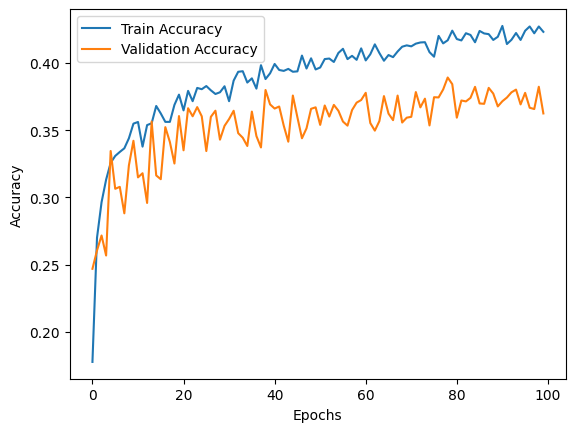

313/313 [==============================] - 1s 4ms/step - loss: 1.8400 - accuracy: 0.3576
Test Loss: 1.8399832248687744
Test Accuracy: 0.35760000348091125
Time taken: 40.3592574596405


In [6]:
plt.plot(history_2.history['accuracy'], label='Train Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss,accuracy =model_2.evaluate(x_test,y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')
print(f'Time taken: {T4-T3}')

NAG

In [12]:
model_3 = models.Sequential(
    [
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(10, activation='softmax')
    ]
)
model_3.summary()

model_3.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True), 
    loss=keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy'], 
    loss_weights=None,
    sample_weight_mode=None, 
    weighted_metrics=None
)


T5= time.time()
history_3 = model_3.fit(x_train, y_train, epochs=100, batch_size=1024, validation_split=0.5)
T6= time.time()

Model: "sequential_5"
_________________________________________________________________


 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 3072)              0         
                                                                 
 dense_11 (Dense)            (None, 10)                30730     
                                                                 
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 1s 34ms/step - loss: 2.3113 - accuracy: 0.1338 - val_loss: 2.2237 - val_accuracy: 0.1878
Epoch 2/100
25/25 [==============================] - 0s 15ms/step - loss: 2.1693 - accuracy: 0.2220 - val_loss: 2.1259 - val_accuracy: 0.2368
Epoch 3/100
25/25 [==============================] - 0s 15ms/step - loss: 2.0929 - accuracy: 0.2572 - val_loss: 2.0707 - val_accuracy: 0.2653
Epoch 4/100
25/25 [==============================] - 0s 15ms/step - loss: 2.0475 - accuracy: 0.2785 - val_lo

evaluating

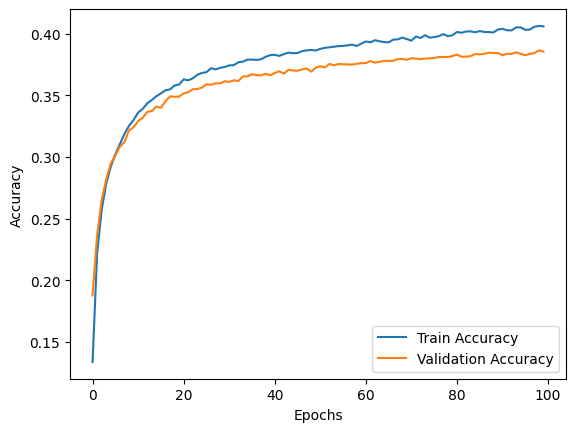

313/313 [==============================] - 1s 3ms/step - loss: 1.7741 - accuracy: 0.3833
Test Loss: 1.7741460800170898
Test Accuracy: 0.3833000063896179
Time taken: 38.58613061904907


In [13]:
plt.plot(history_3.history['accuracy'], label='Train Accuracy')
plt.plot(history_3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss,accuracy =model_3.evaluate(x_test,y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')
print(f'Time taken: {T6-T5}')

SGDR

In [14]:
initial_lr = 0.01
t_0 = 10  # Number of steps for the first cycle
t_mult = 2  # Factor by which t_0 is multiplied after each cycle

lr_schedule = tf.keras.optimizers.schedules.CosineDecayRestarts(
    initial_learning_rate=initial_lr,
    first_decay_steps=t_0,
    t_mul=t_mult
)

model_4 = models.Sequential(
    [
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(10, activation='softmax')
    ]
)
model_4.summary()

model_4.compile(
    optimizer=keras.optimizers.SGD(learning_rate=lr_schedule),
    loss=keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy'], 
    loss_weights=None,
    sample_weight_mode=None, 
    weighted_metrics=None
)


T7= time.time()
history_4 = model_4.fit(x_train, y_train, epochs=100, batch_size=1024, validation_split=0.5)
T8= time.time()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 3072)              0         
                                                                 
 dense_12 (Dense)            (None, 10)                30730     
                                                                 
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0


_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 1s 33ms/step - loss: 2.3452 - accuracy: 0.1140 - val_loss: 2.2649 - val_accuracy: 0.1545
Epoch 2/100
25/25 [==============================] - 0s 15ms/step - loss: 2.2291 - accuracy: 0.1761 - val_loss: 2.1831 - val_accuracy: 0.2066
Epoch 3/100
25/25 [==============================] - 0s 15ms/step - loss: 2.1687 - accuracy: 0.2145 - val_loss: 2.1544 - val_accuracy: 0.2146
Epoch 4/100
25/25 [==============================] - 0s 15ms/step - loss: 2.1205 - accuracy: 0.2374 - val_loss: 2.0954 - val_accuracy: 0.2502
Epoch 5/100
25/25 [==============================] - 0s 15ms/step - loss: 2.0800 - accuracy: 0.2565 - val_loss: 2.0732 - val_accuracy: 0.2580
Epoch 6/100
25/25 [==============================] - 0s 15ms/step - loss: 2.0668 - accuracy: 0.2654 - val_loss: 2.0698 - val_accuracy: 0.2610
Epoch 7/100
25/25 [==============================] - 0s 17ms/step - loss: 2.0506 -

evaluating

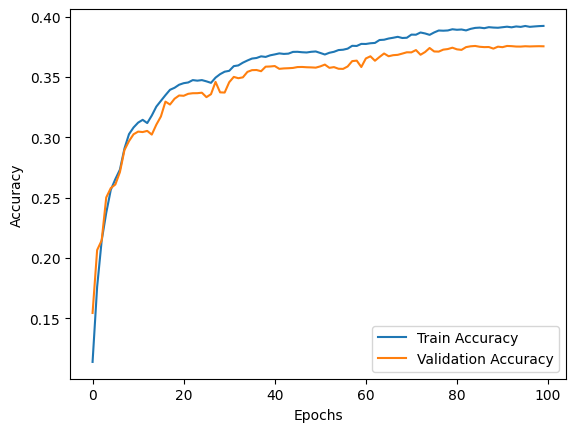

313/313 [==============================] - 1s 4ms/step - loss: 1.8037 - accuracy: 0.3787
Test Loss: 1.803712248802185
Test Accuracy: 0.37869998812675476
Time taken: 39.959792137145996


In [15]:
plt.plot(history_4.history['accuracy'], label='Train Accuracy')
plt.plot(history_4.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss,accuracy =model_4.evaluate(x_test,y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')
print(f'Time taken: {T8-T7}')

Learning Rate Schedulers(Exponential Decay)

In [16]:
initial_lr = 0.01  # Starting learning rate
decay_rate = 0.1   # Factor by which the learning rate decays
decay_steps = 1024 # How often to apply the decay

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_lr,
    decay_steps=decay_steps,
    decay_rate=decay_rate,
    staircase=False  # If True, applies decay in discrete intervals (staircase effect)
)

model_5 = models.Sequential(
    [
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(10, activation='softmax')
    ]
)
model_5.summary()
model_5.compile(
    optimizer=keras.optimizers.SGD(learning_rate=lr_schedule),
    loss=keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy'], 
    loss_weights=None,
    sample_weight_mode=None, 
    weighted_metrics=None
)


T9= time.time()
history_5 = model_5.fit(x_train, y_train, epochs=100, batch_size=1024, validation_split=0.5)
T10= time.time()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 flatten_7 (Flatten)         (None, 3072)              0         
                                                                 
 dense_13 (Dense)            (None, 10)                30730     
                                                                 
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 1s 35ms/step - loss: 2.2639 - accuracy: 0.1571 - val_loss: 2.1887 - val_accuracy: 0.2020
Epoch 2/100
25/25 [==============================] - 0s 15ms/step - loss: 2.1491 - accuracy: 0.2249 - val_loss: 2.1176 - val_accuracy: 0.2342
Epoch 3/100
25/25 [==============================] - 0s 15ms/step - loss: 2.0911 - accuracy: 0.2545 - val_loss: 2.0709 - val_accuracy: 0.2685
Epoch 4/100
25/25 [==============================] - 0s 16ms/step - loss: 2.0535 - accuracy: 0.2739 - val_loss: 2.0442 - val_accuracy: 0.2671
Epoch 5/100
25/25 [=============

evaluating

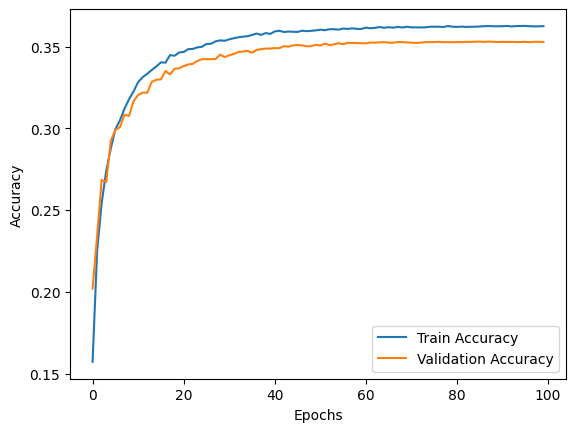

313/313 [==============================] - 1s 3ms/step - loss: 1.8740 - accuracy: 0.3515
Test Loss: 1.8740347623825073
Test Accuracy: 0.351500004529953
Time taken: 38.24498462677002


In [17]:
plt.plot(history_5.history['accuracy'], label='Train Accuracy')
plt.plot(history_5.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss,accuracy =model_5.evaluate(x_test,y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')
print(f'Time taken: {T10-T9}')

Learning Rate Schedulers(Step Decay)

In [18]:
initial_lr = 0.01  # Initial learning rate
decay_steps = [1000, 2000, 5000]  # Step intervals at which the learning rate drops
lr_values = [initial_lr, 0.005, 0.001, 0.0001]  # Learning rates at each interval

# Learning rate schedule
lr_schedule = tf.keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=decay_steps,
    values=lr_values
)

model_6 = models.Sequential(
    [
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(10, activation='softmax')
    ]
)
model_6.summary()
model_6.compile(
    optimizer=keras.optimizers.SGD(learning_rate=lr_schedule),
    loss=keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy'], 
    loss_weights=None,
    sample_weight_mode=None, 
    weighted_metrics=None
)


T11= time.time()
history_6 = model_6.fit(x_train, y_train, epochs=100, batch_size=1024, validation_split=0.5)
T12= time.time()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 3072)              0         
                                                                 
 dense_14 (Dense)            (None, 10)                30730     
                                                                 
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 1s 35ms/step - loss: 2.2772 - accuracy: 0.1471 - val_loss: 2.2000 - val_accuracy: 0.1840
Epoch 2/100
25/25 [==============================] - 0s 16ms/step - loss: 2.1507 - accuracy: 0.2188 - val_loss: 2.1177 - val_accuracy: 0.2398
Epoch 3/100
25/25 [==============================] - 0s 16ms/step - loss: 2.0859 - accuracy: 0.2515 - val_loss: 2.0804 - val_accuracy: 0.2480
Epoch 4/100
25/25 [=

evaluating

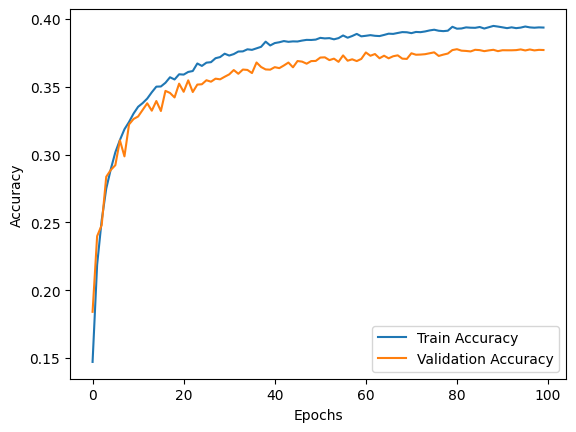

313/313 [==============================] - 1s 3ms/step - loss: 1.7930 - accuracy: 0.3850
Test Loss: 1.7929824590682983
Test Accuracy: 0.38499999046325684
Time taken: 39.201730251312256


In [19]:
plt.plot(history_6.history['accuracy'], label='Train Accuracy')
plt.plot(history_6.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss,accuracy =model_6.evaluate(x_test,y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')
print(f'Time taken: {T12-T11}')

adam

In [20]:
model_7 = models.Sequential(
    [
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(10, activation='softmax')
    ]
)
model_7.summary()

model_7.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy'], 
)


T13= time.time()
history_7 = model_7.fit(x_train, y_train, epochs=100, batch_size=1024, validation_split=0.5)
T14= time.time()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 3072)              0         
                                                                 
 dense_15 (Dense)            (None, 10)                30730     
                                                                 
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 1s 39ms/step - loss: 2.2488 - accuracy: 0.1884 - val_loss: 2.0370 - val_accuracy: 0.2743
Epoch 2/100
25/25 [==============================] - 0s 15ms/step - loss: 1.9795 - accuracy: 0.2989 - val_loss: 1.9333 - val_accuracy: 0.3148
Epoch 3/100
25/25 [==============================] - 0s 16ms/step - loss: 1.9034 - accuracy: 0.3337 - val_loss: 1.8940 - val_accuracy: 0.3346
Epoch 4/100
25/25 [=

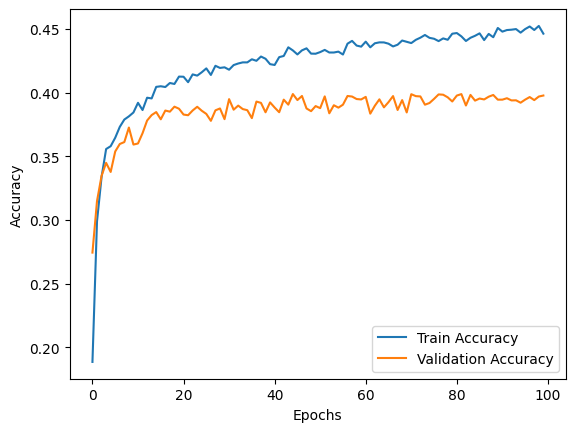

313/313 [==============================] - 1s 3ms/step - loss: 1.7409 - accuracy: 0.3961
Test Loss: 1.7408775091171265
Test Accuracy: 0.3961000144481659
Time taken: 38.02343153953552


In [21]:
plt.plot(history_7.history['accuracy'], label='Train Accuracy')
plt.plot(history_7.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss,accuracy =model_7.evaluate(x_test,y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')
print(f'Time taken: {T14-T13}')